# **Capstone Project: Analyzing Survey Data**

## Introduction

Using the survey data from Stack Overflow, a popular website for developers, I should answer the questions:

• What are the top programming languages in demand?

• What are the top database skills in demand?

• How the typical developer looks like?


Steps to achieve it:

• Make data ready for analysis using data wrangling techniques

• Apply statistical techniques to analyze the data

• Bring all of my information together by creating visualizations

# **Load and explore the dataset**

Import all required modules.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [56]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

### About the dataset:
Stack Overflow, a popular website for developers, conducted an online survey of software professionals across the world. The survey data was later open sourced by Stack Overflow. The actual data set has around 90,000 responses. 

I will use a subset of the original data set in this capstone project. 

The below table lists the questions asked in the survey and the column under which the response was collected. I show here only columns that I will use further:


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| Country       | In which country do you currently reside?                                                                   |
| EdLevel       | Which of the following best describes the highest level of formal education that you've completed?          |
| CompTotal     | What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)?          |
| CompFreq      | Is your compensation weekly, monthly, or yearly?                                                            |
| ConvertedComp | Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.  |
| WorkWeekHrs   | On average, how many hours per week do you work?                                                            |
| CodeRevHrs    | On average, how many hours per week do you spend on code review?                                            |
| LanguageWorkedWith  | Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?                                          |
| LanguageDesireNextYear   | Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?                                                                                    |
| DatabaseWorkedWith        | Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?                                                                              |
| DatabaseDesireNextYear    | Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?                                                                     |
| Age           | What is your age (in years)?                                                                                |
| Gender        | Which of the following do you currently identify as?                                                        |




It is a good idea to print the top 5 rows of the dataset to get a feel of how the dataset will look. 
Display the top 5 rows and columns from dataset:

In [57]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Find out the number of rows and columns

Start by exploring the numbers of rows and columns of data in the dataset. Print the number of rows in the dataset:

In [58]:
df.shape[0]

11552

Print the number of columns in the dataset:

In [59]:
df.shape[1]

85

## Identify the data types of each column

Explore the dataset and identify the data types of each column. Print the datatype of all columns:

In [60]:
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

The dataset is the result of a world wide survey. Print how many unique countries are there in the Country column.

In [61]:
df['Country'].nunique()

135

# **Data Wrangling**


## Finding duplicates


Find how many duplicate rows exist in the dataframe.


In [62]:
len(df)-len(df.drop_duplicates())

154

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [63]:
df = df.drop_duplicates()

Verify if duplicates were actually dropped.


In [64]:
len(df)-len(df.drop_duplicates())

0

## Finding Missing values


Find number of the missing values for all columns.


In [65]:
df.isnull().sum().sum()

30967

Find out how many rows are missing in the column `WorkLoc`:

In [66]:
df['WorkLoc'].isnull().sum()

32

## Imputing missing values


Find the  value counts for the column `WorkLoc`:


In [67]:
df['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [68]:
mode_workloc = df['WorkLoc'].value_counts().idxmax()
mode_workloc

'Office'

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [69]:
df['WorkLoc'] = df['WorkLoc'].replace(np.nan, mode_workloc)

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [70]:
df['WorkLoc'].isnull().sum()

0

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.

In this section I will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [71]:
categories = list(df['CompFreq'].unique())
categories

['Yearly', 'Monthly', 'Weekly', nan]

Create a new column named 'NormalizedAnnualCompensation':


In [72]:
df['NormalizedAnnualCompensation'] = df['CompTotal']
for i in df.index:
    if df.loc[i, 'CompFreq'] == 'Monthly':
        df.loc[i, 'NormalizedAnnualCompensation'] = df.loc[i, 'CompTotal'] * 12
    elif df.loc[i, 'CompFreq'] == 'Weekly':
        df.loc[i, 'NormalizedAnnualCompensation'] = df.loc[i, 'CompTotal'] * 52
df[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']]


,CompFreq,CompTotal,NormalizedAnnualCompensation
0,Yearly,61000.0,61000.0
1,Yearly,138000.0,138000.0
2,Yearly,90000.0,90000.0
3,Monthly,29000.0,348000.0
4,Yearly,90000.0,90000.0
...,...,...,...
11547,Yearly,130000.0,130000.0
11548,Yearly,74400.0,74400.0
11549,Yearly,105000.0,105000.0
11550,Yearly,80000.0,80000.0


# **Exploratory Data Analysis**

## Distribution

### Determine how the data is distributed

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

Plot the distribution curve for the column `ConvertedComp`:

<AxesSubplot:ylabel='Density'>

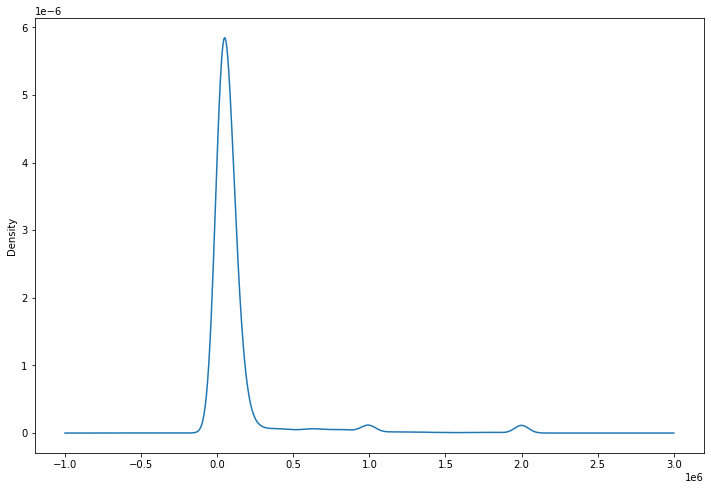

In [73]:
df['ConvertedComp'].plot(kind='kde', figsize=(12,8))

Plot the histogram for the column `ConvertedComp`:

<AxesSubplot:ylabel='Frequency'>

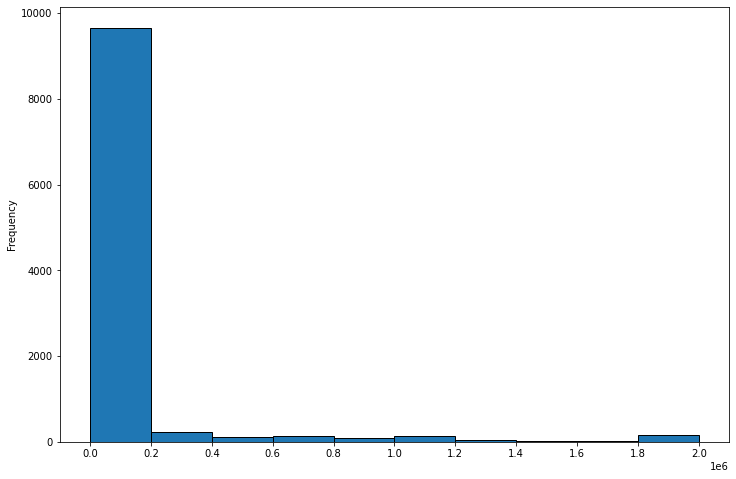

In [74]:
bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 11)
df['ConvertedComp'].plot(kind='hist', edgecolor='black', xticks = bins, figsize=(12,8))

What is the median of the column ConvertedComp?

In [75]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?

In [76]:
df['Gender'][df['Gender'] == 'Man'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [77]:
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?

In [78]:
print('min:', df['Age'].min(), 'q1:', df['Age'].quantile(0.25),
      'median:', df['Age'].median(), 'q3:', df['Age'].quantile(0.75),
      'max:', df['Age'].max())

min: 16.0 q1: 25.0 median: 29.0 q3: 35.0 max: 99.0


Plot a histogram of the column `Age`:

<AxesSubplot:ylabel='Frequency'>

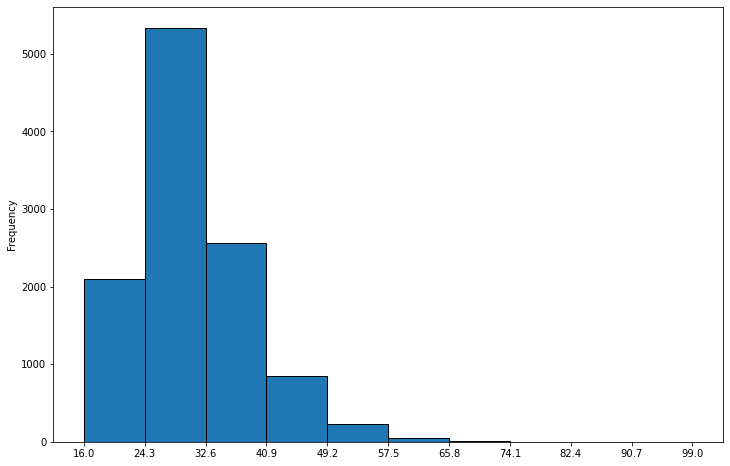

In [79]:
bins = np.linspace(min(df['Age']), max(df['Age']), 11)
df['Age'].plot(kind='hist', edgecolor='black' , xticks = bins, figsize=(12,8))

## Outliers

### Finding outliers

Find out if outliers exist in the column `ConvertedComp` using a box plot:

<AxesSubplot:>

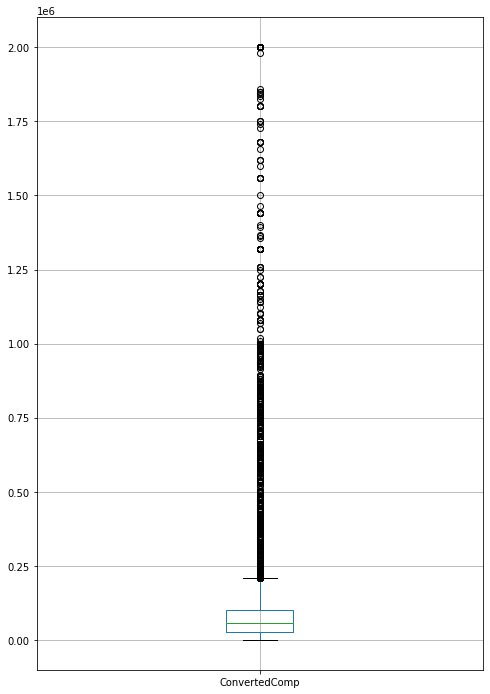

In [80]:
df.boxplot(column = ['ConvertedComp'], figsize=(8,12))

Find out the Inter Quartile Range for the column `ConvertedComp`:

In [81]:
Q1, Q3 = df['ConvertedComp'].quantile(0.25), df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds:

In [82]:
print(df['ConvertedComp'].quantile(0.25), df['ConvertedComp'].quantile(0.75))

26868.0 100000.0


Identify how many outliers are there in the `ConvertedComp` column:

In [83]:
df['ConvertedComp'][df['ConvertedComp'] >= (Q3 + 1.5 * IQR)].count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column:

In [84]:
df['ConvertedComp'] = df['ConvertedComp'][df['ConvertedComp'] <= (Q3 + 1.5 * IQR)]

Verify if removing was successful:

In [86]:
df['ConvertedComp'][df['ConvertedComp'] >= (Q3 + 1.5 * IQR)].count()

0

## Correlation

### Finding correlation

Find the correlation between `Age` and all other numerical columns:

In [87]:
df.corr()['Age']

Respondent                      0.004041
CompTotal                       0.006970
ConvertedComp                   0.401821
WorkWeekHrs                     0.036518
CodeRevHrs                     -0.020469
Age                             1.000000
NormalizedAnnualCompensation   -0.005238
Name: Age, dtype: float64

# **Data Visualization**

## Visualizing relationships in data

Create a scatter plot of `Age` and `ConvertedComp`:

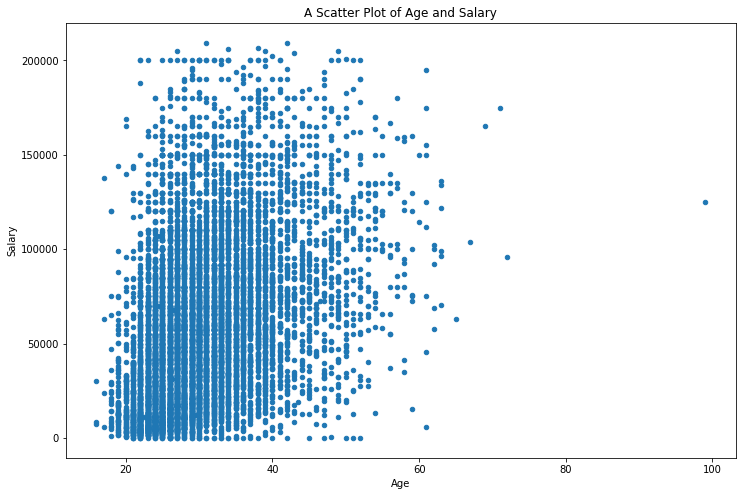

In [90]:
df.plot(kind='scatter', x='Age', y='ConvertedComp', figsize=(12,8))
plt.title('A Scatter Plot of Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

plt.show()

Create a scatter plot of `Age` and `WorkWeekHrs`:

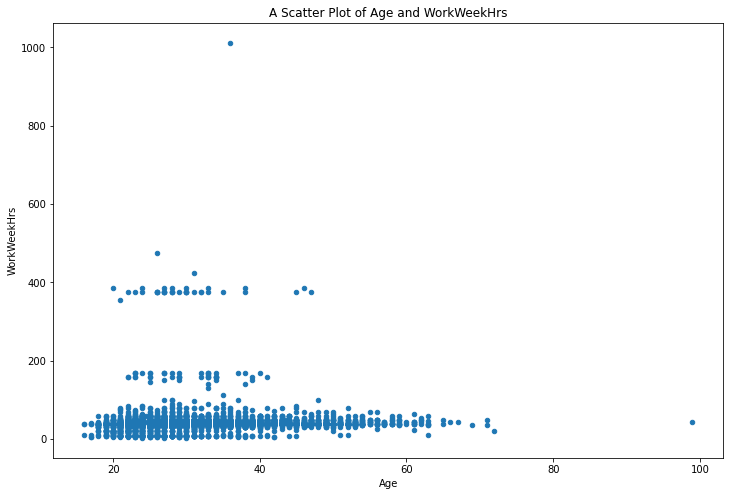

In [91]:
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(12,8))
plt.title('A Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()

As we can see, the older the worker, the less often he overtimes.

Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size:

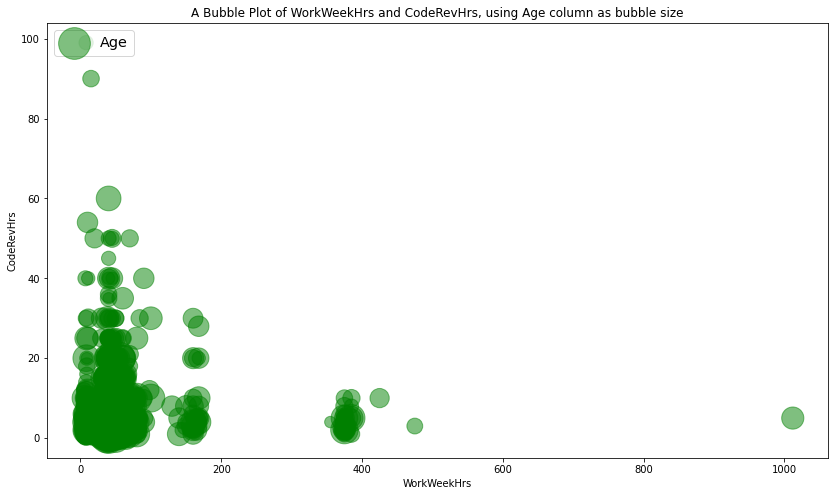

In [92]:
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

ax0 = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_age * 2000 + 10,  # pass in weights 
                    
                    )
ax0.set_ylabel('CodeRevHrs')
ax0.set_xlabel('WorkWeekHrs')
ax0.set_title('A Bubble Plot of WorkWeekHrs and CodeRevHrs, using Age column as bubble size')
ax0.legend(['Age'], loc='upper left', fontsize='x-large')


## Visualizing composition of data

### Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

Since the question about databases had a multiple choice option, I need to split the answers and then to group them:

In [142]:
df_pie = df['DatabaseDesireNextYear']
df_pie = df_pie.str.split(';',expand=True)
df_pie = pd.Series(df_pie.values.ravel('F')).dropna()
df_pie = df_pie.value_counts().head()
df_pie

PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
dtype: int64

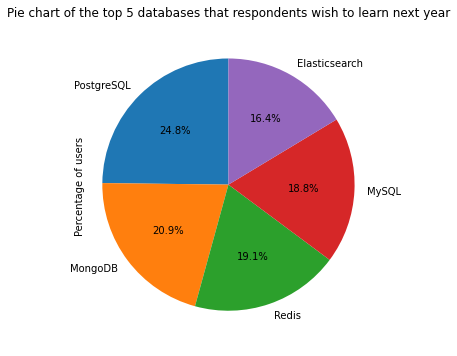

In [143]:
df_pie.plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            startangle=90,     # start angle 90° (Africa)
                            )
plt.title('Pie chart of the top 5 databases that respondents wish to learn next year')
plt.ylabel('Percentage of users')
plt.axis('equal')
plt.show()

Create a pie chart of the respondents classified by Gender:

In [159]:
df_pie1 = df['Gender']
df_pie1 = df_pie1.value_counts().head(2)
df_pie1

Man      10480
Woman      731
Name: Gender, dtype: int64

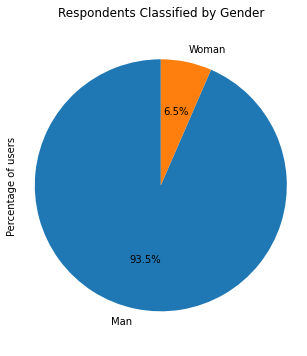

In [161]:
df_pie1.plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            startangle=90,     # start angle 90° (Africa)
                            )
plt.title('Respondents Classified by Gender')
plt.ylabel('Percentage of users')
plt.axis('equal')
plt.show()

Create a pie chart of the respondents classified by Educational Level:

In [164]:
df_pie2 = df['EdLevel']
df_pie2 = df_pie2.value_counts().head()
df_pie2

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              5852
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           2706
Some college/university study without earning a degree                                1361
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     516
Associate degree                                                                       383
Name: EdLevel, dtype: int64

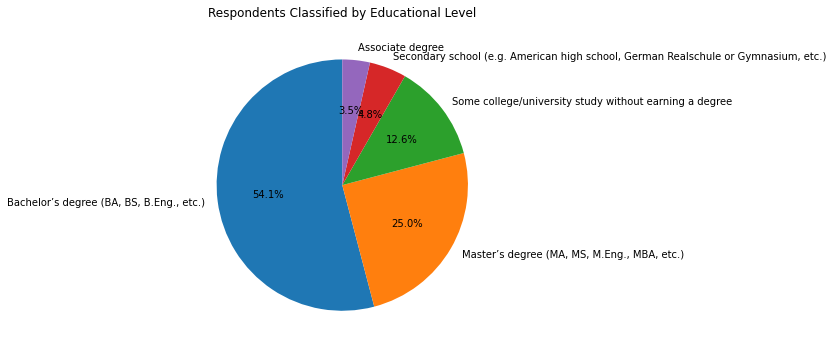

In [167]:
df_pie2.plot(kind='pie',
            figsize=(5, 6),
            autopct='%1.1f%%', # add in percentages
            startangle=90,     # start angle 90° (Africa)
                            )
plt.title('Respondents Classified by Educational Level')
plt.ylabel(' ')
plt.axis('equal')
plt.show()

As we see, typical developer is man about 29 years old with Bachelor's degree.

## Visualizing comparison of data

### Line Chart

Plot the median `ConvertedComp` for all ages from 45 to 60:

In [129]:
df_line = df[['Age', 'ConvertedComp']]
df_line = df_line[['Age', 'ConvertedComp']][(df_line['Age'] >= 45) & (df_line['Age'] <= 60)]
df_line = df_line.groupby(['Age']).median()
df_line.head()

,ConvertedComp
Age,
45.0,83972.0
46.0,88223.0
46.5,72530.0
47.0,86064.0
48.0,100826.0


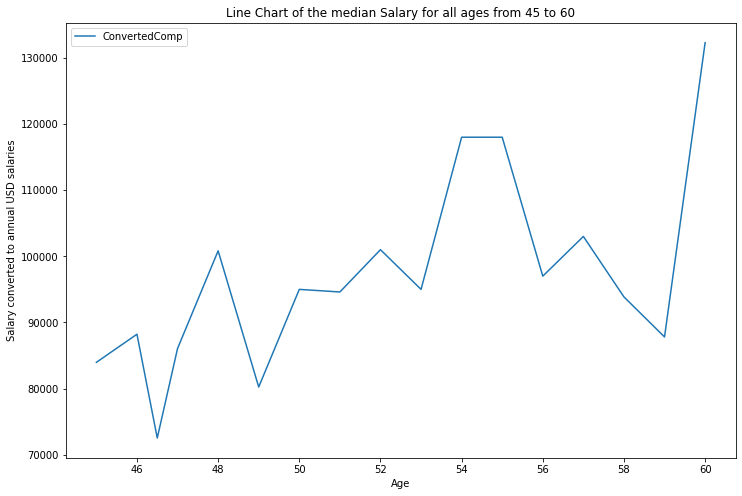

In [130]:
df_line.plot(kind='line',
       figsize=(12, 8))  # pass a tuple (x, y) size

plt.title('Line Chart of the median Salary for all ages from 45 to 60')
plt.ylabel('Salary converted to annual USD salaries')
plt.xlabel('Age')

plt.show()

We see slide trend to increasing median salary depending on Age

### Horizontal Bar Chart

Create a horizontal bar chart of the top 5 languages that respondents use in the current year:

In [149]:
df_barh = df['LanguageWorkedWith']
df_barh = df_barh.str.split(';',expand=True)
df_barh = pd.Series(df_barh.values.ravel('F')).dropna()
df_barh = df_barh.value_counts().head()
df_barh

JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
dtype: int64

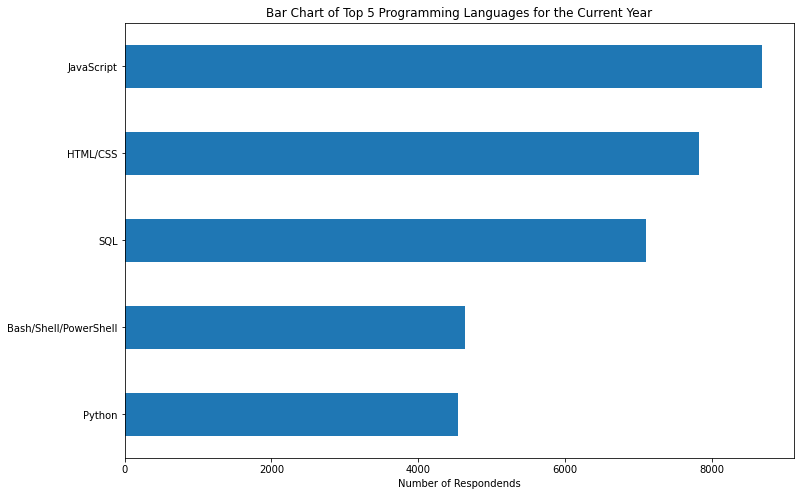

In [150]:
df_barh.sort_values(0).plot(kind='barh',
       figsize=(12, 8))  

plt.title('Bar Chart of Top 5 Programming Languages for the Current Year')

plt.xlabel('Number of Respondends')

plt.show()

Create a horizontal bar chart of the top 5 languages that respondents wish to learn in the next year:

In [151]:
df_barh1 = df['LanguageDesireNextYear']
df_barh1 = df_barh1.str.split(';',expand=True)
df_barh1 = pd.Series(df_barh1.values.ravel('F')).dropna()
df_barh1 = df_barh1.value_counts().head()
df_barh1

JavaScript    6630
HTML/CSS      5328
Python        5239
SQL           5012
TypeScript    4088
dtype: int64

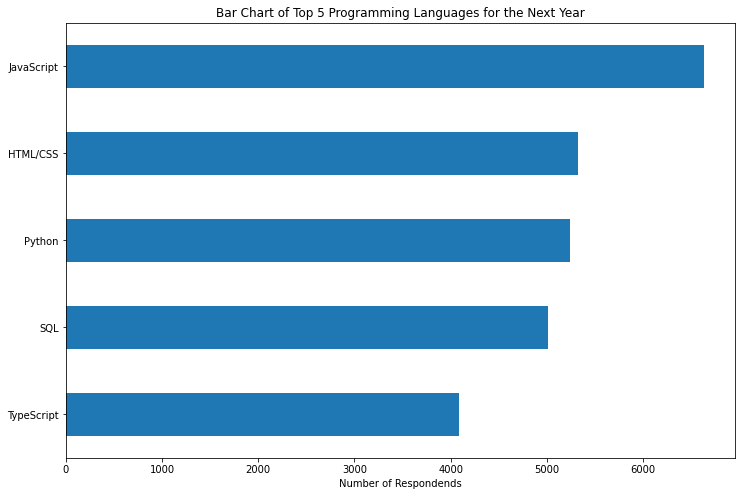

In [152]:
df_barh1.sort_values().plot(kind='barh',
       figsize=(12, 8)) 

plt.title('Bar Chart of Top 5 Programming Languages for the Next Year')

plt.xlabel('Number of Respondends')

plt.show()

As we see, two top languages are the same in the current year and in the next year. It means that JavaScript and HTML will remain in demand in the future.

Python is 3rd language for the next year. Popularity of Python is increasing.

SQL is in the both charts. It is still in demand.


Create a horizontal bar chart of the top 5 databases that respondents use in the current year:

In [153]:
df_barh2 = df['DatabaseWorkedWith']
df_barh2 = df_barh2.str.split(';',expand=True)
df_barh2 = pd.Series(df_barh2.values.ravel('F')).dropna()
df_barh2 = df_barh2.value_counts().head()
df_barh2

MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
dtype: int64

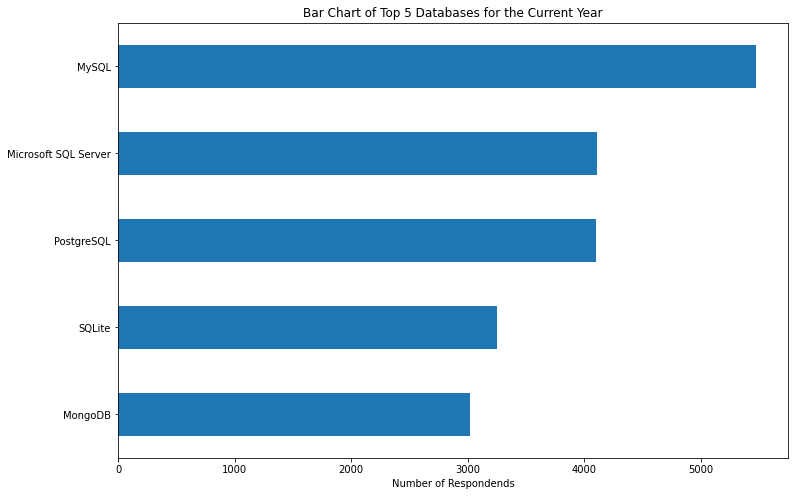

In [154]:
df_barh2.sort_values().plot(kind='barh',
       figsize=(12, 8))  

plt.title('Bar Chart of Top 5 Databases for the Current Year')

plt.xlabel('Number of Respondends')

plt.show()

Create a horizontal bar chart of the top 5 databases that respondents wish to learn in the next year:

In [155]:
df_barh3 = df['DatabaseDesireNextYear']
df_barh3 = df_barh3.str.split(';',expand=True)
df_barh3 = pd.Series(df_barh3.values.ravel('F')).dropna()
df_barh3 = df_barh3.value_counts().head()
df_barh3

PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
dtype: int64

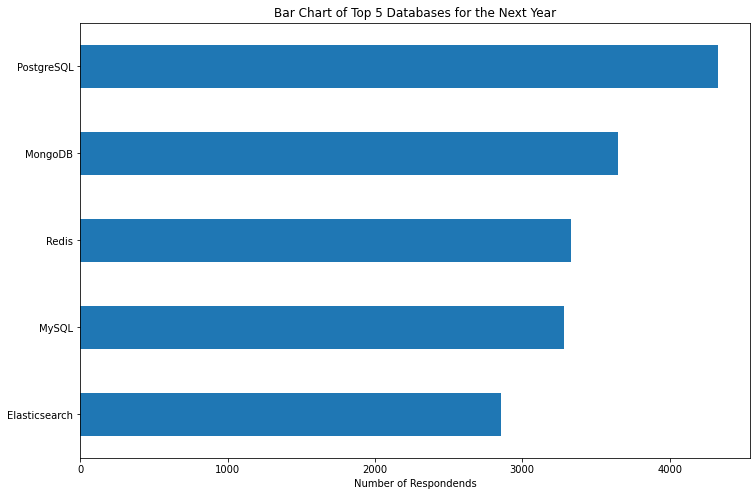

In [157]:
df_barh3.sort_values().plot(kind='barh',
       figsize=(12, 8))

plt.title('Bar Chart of Top 5 Databases for the Next Year')

plt.xlabel('Number of Respondends')

plt.show()

As we see, MySQL is the most popular in the current year but in the next year only forth. It means that everyone already knew MySQL, and also maybe Popularity of MySQL is decreasing.

PostgreSQL is the most popular in the next year. Popularity of PostgreSQL is increasing.

MongoDB and Redis are the second and third databases in the next year. Popularity of NoSQL databases is increasing.

